## ДЗ 1

### 1.2
Изучите стоимости недвижимости

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


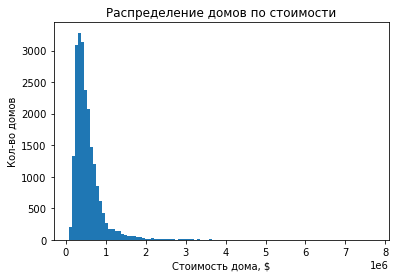

In [2]:
plt.hist(df['price'], bins = 100)
plt.title('Распределение домов по стоимости')
plt.xlabel('Стоимость дома, $')
plt.ylabel('Кол-во домов');

Подавлящее количество домов продаются по цене до 1 млн с мат. ожиданием ~0,5 млн. Количество домов стоимостью выше 2 млн пренебрежительно мало.

### 1.3
Изучите распределение квадратуры жилой площади

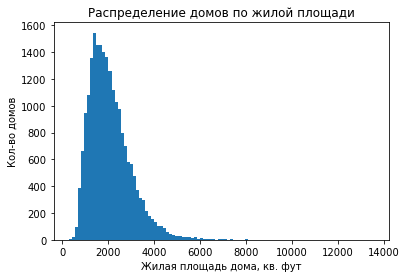

In [3]:
plt.hist(df['sqft_living'], bins = 100)
plt.title('Распределение домов по жилой площади')
plt.xlabel('Жилая площадь дома, кв. фут')
plt.ylabel('Кол-во домов');

Большинство домов имеют площадь от 500 до 4.000 кв. футов с мат. ожиданием ~1.700 кв. футов . Домов с площадью больше 6.000 кв. футов - единичные варианты.

### 1.4
Изучите распределение года постройки

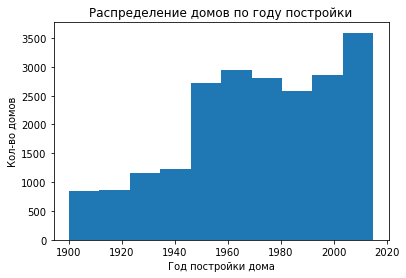

In [4]:
plt.hist(df['yr_built'], bins = 10)
plt.title('Распределение домов по году постройки')
plt.xlabel('Год постройки дома')
plt.ylabel('Кол-во домов');

Большинство домов построены после 1940-х гг (послевоенный бум) - практически равное распределение по десятилетиям от 1950-х до 2000-х включительно с ~20% скачком в 2010-х.

## ДЗ 2

### 2.1
Изучите распределение домов от наличия вида на набережную

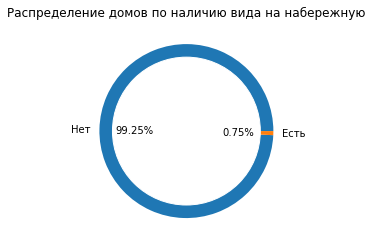

In [5]:
plt.pie(df['waterfront'].value_counts(), labels = ['Нет', 'Есть'], autopct = '%1.2f%%')
plt.title('Распределение домов по наличию вида на набережную')
donut = plt.Circle((0, 0), 0.85, color = 'white')
p = plt.gcf()
p.gca().add_artist(donut);

Выводы очевидны

### 2.2
Изучите распределение этажей домов

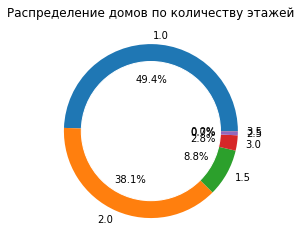

In [6]:
plt.pie(df['floors'].value_counts(), labels = df['floors'].value_counts().index, autopct = '%1.1f%%')
plt.title('Распределение домов по количеству этажей')
donut = plt.Circle((0, 0), 0.8, color = 'white')
p = plt.gcf()
p.gca().add_artist(donut);

Практически половина домов - одноэтажные. ~38% домов имеют 2 этажа, ~9% - 1,5 (?) этажа. Менее 4% приходится на прочие варианты.

### 2.3
Изучите распределение состояния домов

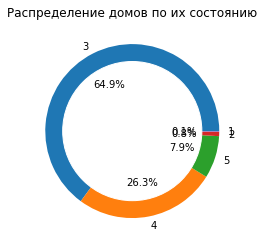

In [7]:
plt.pie(df['condition'].value_counts(), labels = df['condition'].value_counts().index, autopct = '%1.1f%%')
plt.title('Распределение домов по их состоянию')
donut = plt.Circle((0, 0), 0.8, color = 'white')
p = plt.gcf()
p.gca().add_artist(donut);

Около 2/3 домов находятся в среднем состоянии. Чуть больше четверти - в хорошем, а ~8% - в отличном. Плохих и ужасных домов - менее 1%.

## ДЗ 3

Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.

In [8]:
df.corr().style.background_gradient(cmap = 'coolwarm')

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


Наибольшее влияние на стоимость дома оказывает (очевидным образом) объём жилой площади.

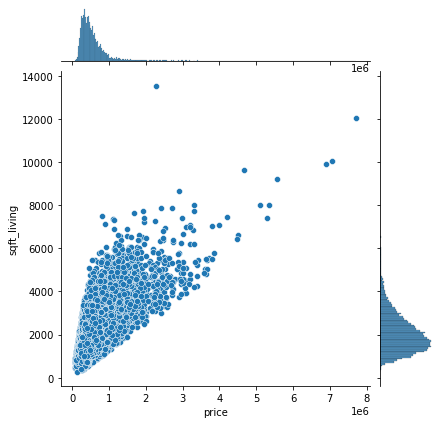

In [9]:
import seaborn as sns
sns.jointplot(x = df['price'], y = df['sqft_living']);

Как видно из графика, каждая последующая (условно говоря) тысяча долларов в стоимости долларов даёт практически экспоненциальный рост в жилой площади вплоть до ~5.000 кв. футов. После этого (одновременно со снижением количества лотов) зависимость становится более линейной.

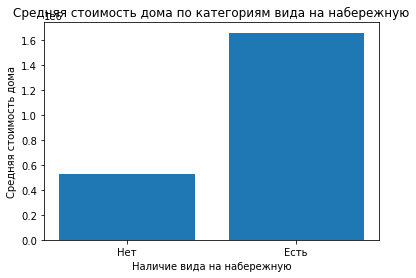

In [10]:
data = df.groupby(['waterfront'])['price'].mean().reset_index()
plt.bar(data['waterfront'], data['price'])
plt.title('Средняя стоимость дома по категориям вида на набережную')
plt.xticks(ticks = [0, 1], labels = ['Нет', 'Есть'])
plt.xlabel('Наличие вида на набережную')
plt.ylabel('Средняя стоимость дома');

Дом с видом на набережную в среднем в 3 раза дороже дома без такового вида.

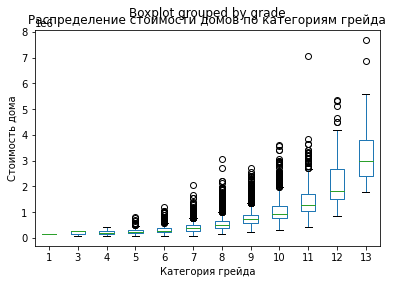

In [11]:
df.boxplot(by = 'grade', column = ['price'], grid = False)
plt.title('Распределение стоимости домов по категориям грейда')
plt.xlabel('Категория грейда')
plt.ylabel('Стоимость дома');

Ещё один параметр, влияющий на стоимость дома - его грейд: чем он выше - тем не только дороже дом, но и больше разброс цен. На низких грейдах разброса практически нет, а на высших грейдах разброс цен кратный.

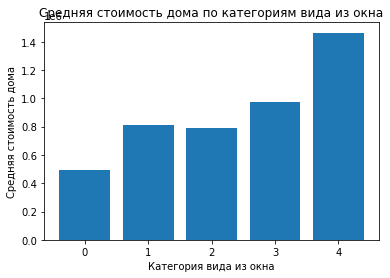

In [12]:
data = df.groupby(['view'])['price'].mean().sort_index().reset_index()
plt.bar(data['view'], data['price'])
plt.title('Средняя стоимость дома по категориям вида из окна')
plt.xlabel('Категория вида из окна')
plt.ylabel('Средняя стоимость дома');

Дома со средними категориями вида (1-3) стоят сравнительно одинаково, а вот пограничные значения категорий вида (0 и 4) сильно влияют на стоимость дома.